   Year   Price
0  2018  465000
1  2019  755000
2  2019  700000
3  2018  465000
4  2018  465000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB
None
Linear Regression RMSE: 65779.22359552195
Linear Regression R^2: 0.36759313425902185
Lasso Regression RMSE: 65779.18826038415
Lasso Regression R^2: 0.36759381368868127


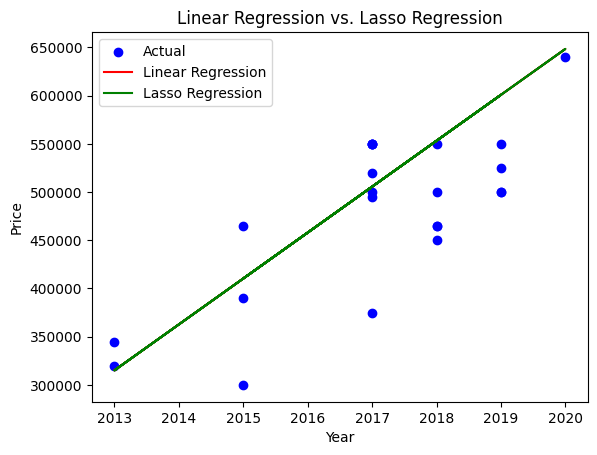

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load and Explore the Data
data = pd.read_csv('car_age_price.csv')
print(data.head())  # Ensure data is loaded correctly
print(data.info())  # Check for missing values and data types

# Step 2: Split the Data
X = data[['Year']]
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Step 4: Create Lasso Regression Model
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter for tuning
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Step 5: Compare the Performance
linear_rmse = mean_squared_error(y_test, y_pred_linear, squared=False)
linear_r2 = r2_score(y_test, y_pred_linear)

lasso_rmse = mean_squared_error(y_test, y_pred_lasso, squared=False)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("Linear Regression RMSE:", linear_rmse)
print("Linear Regression R^2:", linear_r2)
print("Lasso Regression RMSE:", lasso_rmse)
print("Lasso Regression R^2:", lasso_r2)

# Visualization
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_linear, color='red', label='Linear Regression')
plt.plot(X_test, y_pred_lasso, color='green', label='Lasso Regression')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Linear Regression vs. Lasso Regression')
plt.legend()
plt.show()


   Year   Price
0  2018  465000
1  2019  755000
2  2019  700000
3  2018  465000
4  2018  465000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB
None
Linear Regression RMSE: 65779.22359552195
Linear Regression R^2: 0.36759313425902185
Lasso Regression RMSE: 65743.92396852464
Lasso Regression R^2: 0.36827169917274416
Best Lasso Alpha: 100.0


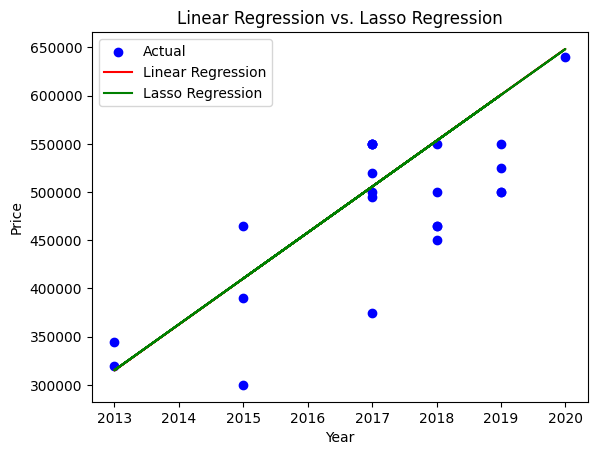

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load and Explore the Data
data = pd.read_csv('car_age_price.csv')
print(data.head())  # Ensure data is loaded correctly
print(data.info())  # Check for missing values and data types

# Step 2: Split the Data
X = data[['Year']]
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Step 4: Create Lasso Regression Model with Hyperparameter Search
lasso_model = Lasso()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}  # Different alpha values to try
lasso_grid_search = GridSearchCV(lasso_model, param_grid, cv=5)  # 5-fold cross-validation
lasso_grid_search.fit(X_train, y_train)
y_pred_lasso = lasso_grid_search.predict(X_test)

# Best alpha value found during the search
best_alpha = lasso_grid_search.best_params_['alpha']

# Step 5: Compare the Performance
linear_rmse = mean_squared_error(y_test, y_pred_linear, squared=False)
linear_r2 = r2_score(y_test, y_pred_linear)

lasso_rmse = mean_squared_error(y_test, y_pred_lasso, squared=False)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("Linear Regression RMSE:", linear_rmse)
print("Linear Regression R^2:", linear_r2)
print("Lasso Regression RMSE:", lasso_rmse)
print("Lasso Regression R^2:", lasso_r2)
print("Best Lasso Alpha:", best_alpha)

# Visualization
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_linear, color='red', label='Linear Regression')
plt.plot(X_test, y_pred_lasso, color='green', label='Lasso Regression')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Linear Regression vs. Lasso Regression')
plt.legend()
plt.show()


Linear Regression RMSE: 65779.22359552195
Linear Regression R^2: 0.36759313425902185
Lasso Regression RMSE: 65779.18826038415
Lasso Regression R^2: 0.36759381368868127


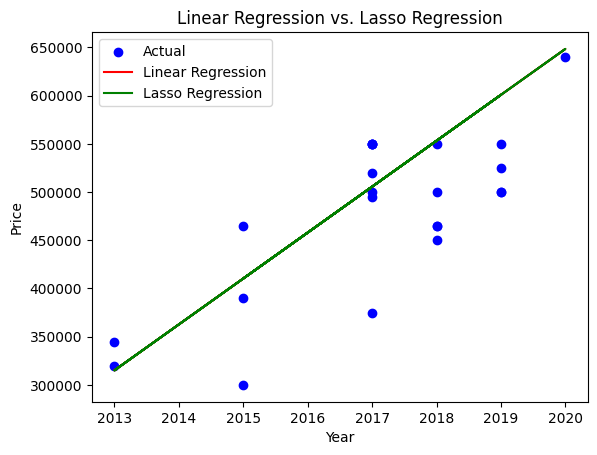

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load and Explore the Data (Assuming the 'car_age_price.csv' file is in the same directory)
data = pd.read_csv('car_age_price.csv')

# Step 2: Split the Data
X = data[['Year']]
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Step 4: Create Lasso Regression Model with Hyperparameter Search
lasso_model = Lasso(alpha=0.1)  # Set the best alpha value from the hyperparameter search
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Step 5: Compare the Performance
linear_rmse = mean_squared_error(y_test, y_pred_linear, squared=False)
linear_r2 = r2_score(y_test, y_pred_linear)

lasso_rmse = mean_squared_error(y_test, y_pred_lasso, squared=False)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("Linear Regression RMSE:", linear_rmse)
print("Linear Regression R^2:", linear_r2)
print("Lasso Regression RMSE:", lasso_rmse)
print("Lasso Regression R^2:", lasso_r2)

# Visualization
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_linear, color='red', label='Linear Regression')
plt.plot(X_test, y_pred_lasso, color='green', label='Lasso Regression')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Linear Regression vs. Lasso Regression')
plt.legend()
plt.show()
